In [1]:
#!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import xgboost as xgb


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


import datetime

In [3]:
pd.set_option("display.expand_frame_repr", False)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('../CSV files/publisher rank - Final ranking.csv')

In [5]:
df.head()

,Rank,publisher_id,Publisher_name,count_skus,count_products,num_retailers,total_points,points_median,importance_mode,remaining_lifecycle_months_median,count_geographies,count_listings
0,1,2,Sony,1620,60,1014,299713,4.0,1,24,79,24132
1,2,19,Ubisoft,2426,87,885,377481,4.0,2,15,78,28790
2,3,3,Electronic Arts,1764,110,983,401275,4.0,1,4,79,28536
3,4,4,2K Games,1542,69,913,327091,4.0,1,2,78,22616
4,5,1,Warners,1298,50,930,257739,4.0,2,16,77,20585


In [6]:
summary_stats = df.describe()
summary_stats

,Rank,publisher_id,count_skus,count_products,num_retailers,total_points,points_median,importance_mode,remaining_lifecycle_months_median,count_geographies,count_listings
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,55.000000,219.293578,273.733945,25.972477,392.321101,52264.238532,5.284404,2.669725,15.183486,63.330275,3493.330275
std,31.609598,177.835666,427.490841,29.549224,246.642637,83390.918604,1.694718,0.943349,9.689786,11.343994,6069.588527
min,1.000000,1.000000,21.000000,1.000000,87.000000,5004.000000,3.000000,1.000000,-8.000000,31.000000,222.000000
25%,28.000000,47.000000,64.000000,8.000000,203.000000,10279.000000,4.000000,2.000000,9.000000,58.000000,629.000000
50%,55.000000,244.000000,104.000000,15.000000,314.000000,18445.000000,5.000000,3.000000,15.000000,65.000000,1092.000000
75%,82.000000,333.000000,216.000000,27.000000,526.000000,44529.000000,6.000000,3.000000,22.000000,71.000000,2390.000000
max,109.000000,660.000000,2426.000000,137.000000,1014.000000,401275.000000,12.000000,5.000000,46.000000,79.000000,28790.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rank                               109 non-null    int64  
 1   publisher_id                       109 non-null    int64  
 2   Publisher_name                     109 non-null    object 
 3   count_skus                         109 non-null    int64  
 4   count_products                     109 non-null    int64  
 5   num_retailers                      109 non-null    int64  
 6   total_points                       109 non-null    int64  
 7   points_median                      109 non-null    float64
 8   importance_mode                    109 non-null    int64  
 9   remaining_lifecycle_months_median  109 non-null    int64  
 10  count_geographies                  109 non-null    int64  
 11  count_listings                     109 non-null    int64  

In [8]:
# specify the order of the categories for column 'B'
categories = [1, 2, 3, 4, 5]

df['importance_mode'] = pd.Categorical(df['importance_mode'], categories=categories)

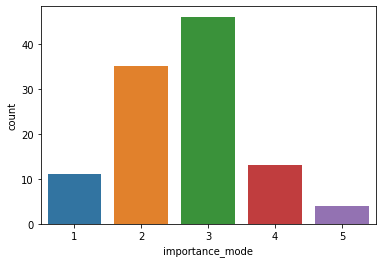

In [9]:
sns.countplot(data=df, x='importance_mode')
plt.show()

In [10]:
df_dummies = pd.get_dummies(df, columns=['importance_mode'], drop_first =True)

In [11]:
X = df_dummies.drop(columns = ['publisher_id','Publisher_name','Rank'])
y = df_dummies['Rank']

In [12]:
X.head()

,count_skus,count_products,num_retailers,total_points,points_median,remaining_lifecycle_months_median,count_geographies,count_listings,importance_mode_2,importance_mode_3,importance_mode_4,importance_mode_5
0,1620,60,1014,299713,4.0,24,79,24132,0,0,0,0
1,2426,87,885,377481,4.0,15,78,28790,1,0,0,0
2,1764,110,983,401275,4.0,4,79,28536,0,0,0,0
3,1542,69,913,327091,4.0,2,78,22616,0,0,0,0
4,1298,50,930,257739,4.0,16,77,20585,1,0,0,0


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=7)

In [14]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (87, 12)
y_train shape: (87,)
X_test shape: (22, 12)
y_test shape: (22,)


In [15]:
correlation_matrix = X_train.corr()
print(correlation_matrix.head())

                count_skus  count_products  num_retailers  total_points  points_median  remaining_lifecycle_months_median  count_geographies  count_listings  importance_mode_2  importance_mode_3  importance_mode_4  importance_mode_5
count_skus        1.000000        0.804909       0.776103      0.974910      -0.234220                          -0.107810           0.513224        0.978185           0.154889          -0.265453          -0.190593          -0.074387
count_products    0.804909        1.000000       0.598758      0.816658      -0.091395                          -0.107994           0.414438        0.771915           0.090073          -0.096134          -0.185801           0.015771
num_retailers     0.776103        0.598758       1.000000      0.795948      -0.474780                          -0.167662           0.809616        0.799481           0.250380          -0.385445          -0.288198          -0.092652
total_points      0.974910        0.816658       0.795948      1.000

In [16]:
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif.sort_values(by='VIF', ascending=False))

                             Variable         VIF
7                      count_listings  463.187403
3                        total_points  443.229820
6                   count_geographies   77.590530
0                          count_skus   46.355668
2                       num_retailers   38.991953
1                      count_products   17.533992
9                   importance_mode_3   13.059004
4                       points_median    9.857513
8                   importance_mode_2    6.353037
10                  importance_mode_4    4.889666
5   remaining_lifecycle_months_median    3.530124
11                  importance_mode_5    2.528330


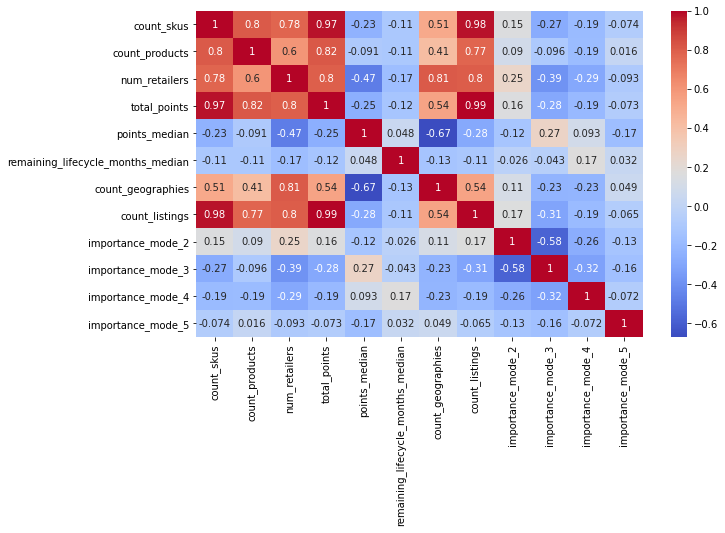

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

In [18]:
X_train_2 = X_train.drop(columns = ['total_points', 'count_geographies'])
X_train_3 = X_train.drop(columns = ['total_points', 'count_geographies', 'count_skus'])
X_train_4 = X_train.drop(columns = ['total_points', 'count_geographies', 'count_skus', 'num_retailers'])
X_train_5 = X_train.drop(columns = ['total_points', 'count_geographies', 'count_skus', 'num_retailers', 'points_median'])
X_train_6 = X_train.drop(columns = ['total_points', 'count_geographies', 'count_skus', 'num_retailers', 'points_median', 'count_products'])


In [19]:
X_test_2 = X_test.drop(columns = ['total_points', 'count_geographies'])
X_test_3 = X_test.drop(columns = ['total_points', 'count_geographies', 'count_skus'])
X_test_4 = X_test.drop(columns = ['total_points', 'count_geographies', 'count_skus', 'num_retailers'])
X_test_5 = X_test.drop(columns = ['total_points', 'count_geographies', 'count_skus', 'num_retailers', 'points_median'])
X_test_6 = X_test.drop(columns = ['total_points', 'count_geographies', 'count_skus', 'num_retailers', 'points_median', 'count_products'])


In [20]:
correlation_matrix2 = X_train_2.corr()
vif2 = pd.DataFrame()
vif2["Variable"] = X_train_2.columns
vif2["VIF"] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
print(vif2.sort_values(by='VIF', ascending=False))

                            Variable        VIF
0                         count_skus  38.869921
5                     count_listings  36.060491
3                      points_median   8.715714
2                      num_retailers   6.838540
1                     count_products   5.771958
7                  importance_mode_3   5.138947
6                  importance_mode_2   3.417613
4  remaining_lifecycle_months_median   3.362117
8                  importance_mode_4   2.282029
9                  importance_mode_5   1.246907


In [21]:
correlation_matrix3 = X_train_3.corr()
vif3 = pd.DataFrame()
vif3["Variable"] = X_train_3.columns
vif3["VIF"] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
print(vif3.sort_values(by='VIF', ascending=False))

                            Variable       VIF
2                      points_median  8.673172
1                      num_retailers  6.823951
4                     count_listings  6.260484
6                  importance_mode_3  5.138805
0                     count_products  5.089009
5                  importance_mode_2  3.416621
3  remaining_lifecycle_months_median  3.361003
7                  importance_mode_4  2.279601
8                  importance_mode_5  1.236892


In [22]:
correlation_matrix4 = X_train_4.corr()
vif4 = pd.DataFrame()
vif4["Variable"] = X_train_4.columns
vif4["VIF"] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
print(vif4.sort_values(by='VIF', ascending=False))

                            Variable       VIF
1                      points_median  8.349003
0                     count_products  5.088912
5                  importance_mode_3  5.044568
3                     count_listings  4.103748
2  remaining_lifecycle_months_median  3.277040
4                  importance_mode_2  3.141077
6                  importance_mode_4  2.276010
7                  importance_mode_5  1.224949


In [23]:
correlation_matrix5 = X_train_5.corr()
vif5 = pd.DataFrame()
vif5["Variable"] = X_train_5.columns
vif5["VIF"] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
print(vif5.sort_values(by='VIF', ascending=False))

                            Variable       VIF
0                     count_products  5.058163
2                     count_listings  4.072900
1  remaining_lifecycle_months_median  3.114181
4                  importance_mode_3  2.311258
3                  importance_mode_2  1.860785
5                  importance_mode_4  1.508506
6                  importance_mode_5  1.158352


In [24]:
correlation_matrix6 = X_train_6.corr()
vif6 = pd.DataFrame()
vif6["Variable"] = X_train_6.columns
vif6["VIF"] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
print(vif6.sort_values(by='VIF', ascending=False))

                            Variable       VIF
0  remaining_lifecycle_months_median  3.095226
3                  importance_mode_3  1.813222
2                  importance_mode_2  1.730703
4                  importance_mode_4  1.448099
1                     count_listings  1.264005
5                  importance_mode_5  1.089221


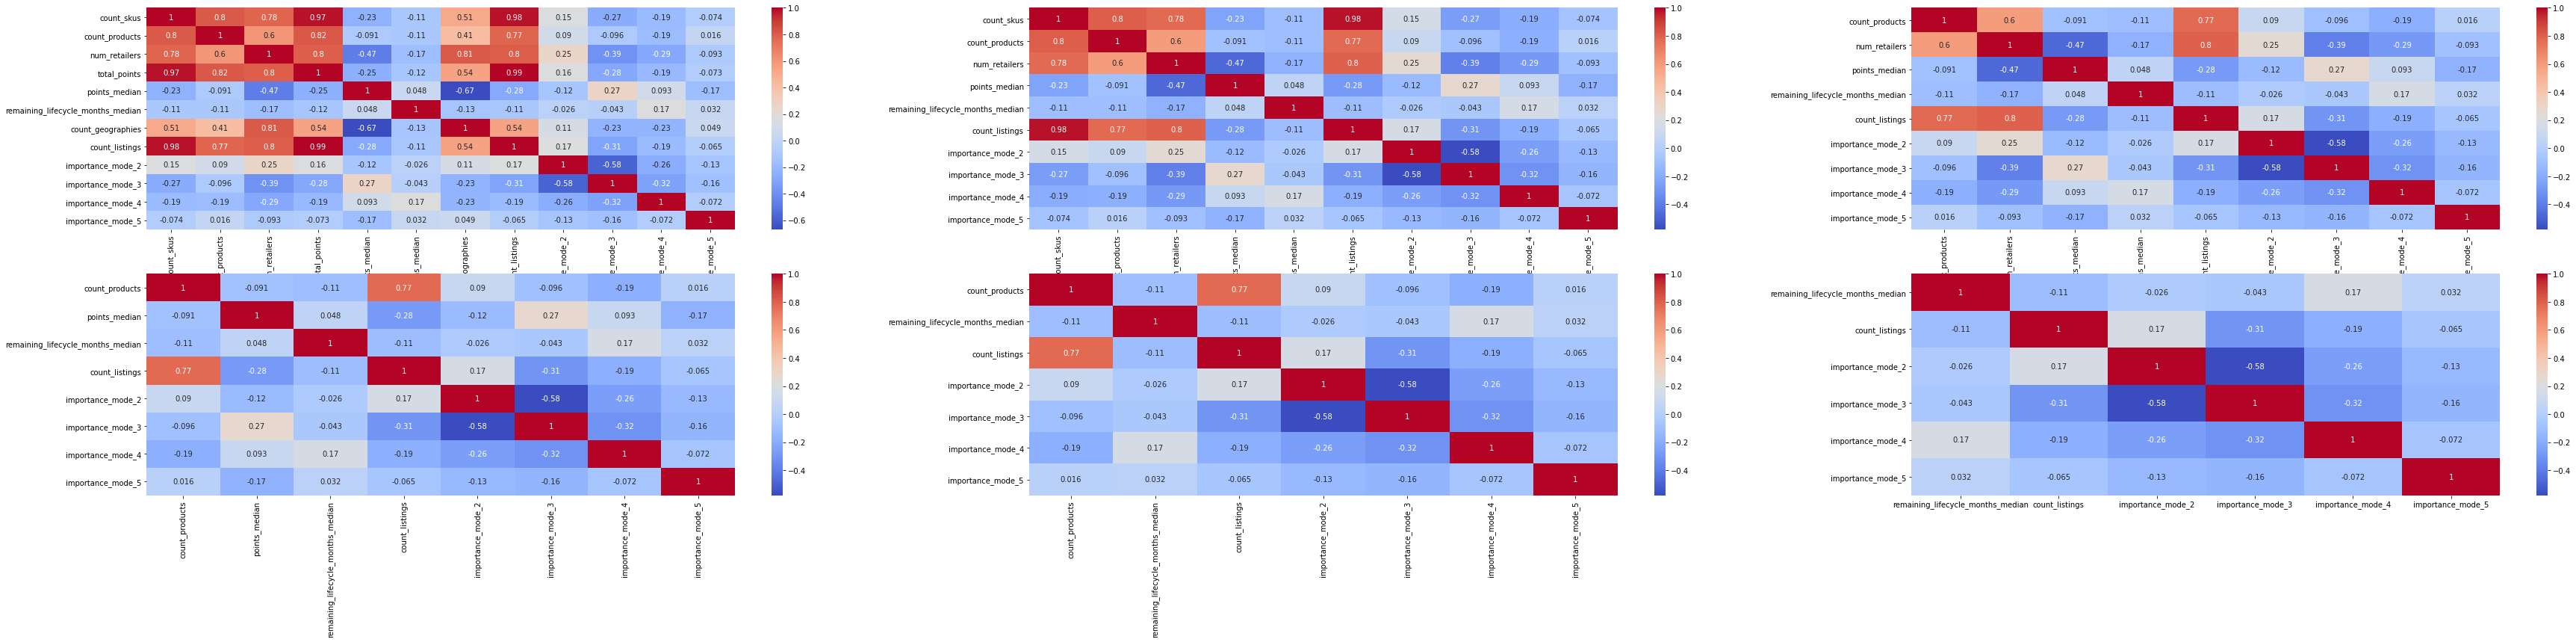

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(60, 12))  

sns.heatmap(correlation_matrix, ax=axes[0][0], annot=True, cmap="coolwarm")
sns.heatmap(correlation_matrix2, ax=axes[0][1], annot=True, cmap="coolwarm")
sns.heatmap(correlation_matrix3, ax=axes[0][2], annot=True, cmap="coolwarm")
sns.heatmap(correlation_matrix4, ax=axes[1][0], annot=True, cmap="coolwarm")
sns.heatmap(correlation_matrix5, ax=axes[1][1], annot=True, cmap="coolwarm")
sns.heatmap(correlation_matrix6, ax=axes[1][2], annot=True, cmap="coolwarm")

plt.show()

In [26]:
X_train_scaled = StandardScaler().fit_transform(X_train_4)
X_test_scaled = StandardScaler().fit_transform(X_test_4)
#y_train_scaled = StandardScaler().fit_transform(y_train)
#y_test_scaled = StandardScaler().fit_transform(y_test)


In [27]:
X_train_scaled

array([[-3.04687953e-01,  4.55336158e-01, -1.60992559e-01,
        -4.46859520e-01, -6.88894964e-01,  1.19023807e+00,
        -3.80442955e-01, -1.88982237e-01],
       [ 3.70231291e+00, -7.09788717e-01, -8.51446561e-01,
         9.89132543e-01, -6.88894964e-01,  1.19023807e+00,
        -3.80442955e-01, -1.88982237e-01],
       [ 3.80269460e-01, -7.09788717e-01,  6.28097729e-01,
         3.55583656e-01, -6.88894964e-01, -8.40168050e-01,
        -3.80442955e-01, -1.88982237e-01],
       [-7.84158142e-01, -7.09788717e-01, -1.04871913e+00,
        -5.22479165e-01,  1.45160010e+00, -8.40168050e-01,
        -3.80442955e-01, -1.88982237e-01],
       [-1.33448599e-01, -1.27226279e-01, -2.59628845e-01,
        -3.77645672e-01, -6.88894964e-01, -8.40168050e-01,
        -3.80442955e-01,  5.29150262e+00],
       [-8.52653883e-01, -1.27226279e-01, -2.03508199e+00,
        -5.22166688e-01,  1.45160010e+00, -8.40168050e-01,
        -3.80442955e-01, -1.88982237e-01],
       [ 3.77907538e-02,  1.620461

In [120]:
def train_and_test(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_int = mean_squared_error(y_test, y_pred)
    mse = round(mse_int, 3)
    rmse = round((mse_int)**0.5, 3)
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    r2 = round(r2_score(y_test, y_pred), 3)
    print(f'RMSE = {rmse}')
    print(f'MAE = {mae}')
    print(f'R2 = {r2}') 

In [121]:
models = [Lasso(), Ridge(), ElasticNet(), GradientBoostingRegressor(), AdaBoostRegressor(),RandomForestRegressor(), xgb.XGBRegressor(), xgb.XGBRFRegressor()]


for model in models:
    train_and_test(model)

/Users/kaijones/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.379e+03, tolerance: 8.346e+00
  model = cd_fast.enet_coordinate_descent(
/Users/kaijones/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.385e+03, tolerance: 8.346e+00
  model = cd_fast.enet_coordinate_descent(


RMSE = 13.282
MAE = 11.0
R2 = 0.838
RMSE = 11.996
MAE = 10.093
R2 = 0.868
RMSE = 13.278
MAE = 11.068
R2 = 0.838
RMSE = 6.788
MAE = 4.255
R2 = 0.958
RMSE = 8.733
MAE = 4.917
R2 = 0.93
RMSE = 9.158
MAE = 5.345
R2 = 0.923
RMSE = 6.914
MAE = 4.162
R2 = 0.956
RMSE = 9.48
MAE = 5.534
R2 = 0.918


In [30]:
# First let's have a function that allows you to print the performance metric

def get_reg_results(truth, prediction, df, idx):
    '''
    This function generates a results dataframe given your y_test and predictions. 
    It allows you to take the output of this function and put it into the next time you call the function
    Filling out the entirity of the dataframe one function call (and row) at a time
    Inputs:
    - truth = y_test, the actual values
    - prediction = your predictions
    - df = a dataframe that is already set up to hold our data. 
    - idx = the method that you are using (which corresponds to a row index)
    Output:
    - the input df, but with another row filled out
    '''
    
    mse_int = mean_squared_error(y_test, y_pred)
    mse = round(mse_int, 3)
    rmse = round((mse_int)**0.5, 3)
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    
    SS_Residual = sum((truth-prediction)**2)       
    SS_Total = sum((truth-np.mean(truth))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    
    r2 = round(r_squared, 3)
    
    
    df.loc[idx, :] = [rmse, mae, r2, ]
    
    return df

In [31]:
model_names = ['Lasso', 'Ridge','ElasticNet', 'GradientBoostingRegressor', 'AdaBoostRegressor', 'RandomForestRegressor', 'XGBRegressor', 'XGBRFRegressor']
results = pd.DataFrame(index = model_names, columns = ['RMSE', 'MAE', 'R2'])
results


,RMSE,MAE,R2
Lasso,NaN,NaN,NaN
Ridge,NaN,NaN,NaN
ElasticNet,NaN,NaN,NaN
GradientBoostingRegressor,NaN,NaN,NaN
AdaBoostRegressor,NaN,NaN,NaN
RandomForestRegressor,NaN,NaN,NaN
XGBRegressor,NaN,NaN,NaN
XGBRFRegressor,NaN,NaN,NaN


In [116]:
fitted_models = {}
for i, model in enumerate(models):
    model.fit(X_train_scaled, y_train)
    y_pred =model.predict(X_test_scaled)
    results = get_reg_results(y_test, y_pred, results, model_names[i])
    fitted_models[model_names[i]] = model



In [117]:
results

,RMSE,MAE,R2
Lasso,20.644,17.079,0.609
Ridge,18.736,14.85,0.678
ElasticNet,21.743,18.453,0.567
GradientBoostingRegressor,11.69,8.873,0.875
AdaBoostRegressor,12.685,9.037,0.853
RandomForestRegressor,12.689,9.491,0.852
XGBRegressor,12.156,8.365,0.865
XGBRFRegressor,12.015,8.984,0.868


In [34]:
X_train_4

,count_products,points_median,remaining_lifecycle_months_median,count_listings,importance_mode_2,importance_mode_3,importance_mode_4,importance_mode_5
65,17,6.0,14,855,0,1,0,0
15,134,4.0,7,10046,0,1,0,0
11,37,4.0,22,5991,0,0,0,0
104,3,4.0,5,371,1,0,0,0
51,22,5.0,13,1298,0,0,0,1
102,1,5.0,-5,373,1,0,0,0
73,27,8.0,14,648,1,0,0,0
18,26,4.0,29,3386,1,0,0,0
71,6,5.0,43,673,0,1,0,0
2,110,4.0,4,28536,0,0,0,0


In [35]:
lasso_df = pd.DataFrame({'variable': list(X_train_4.columns), 'estimate': fitted_models['Lasso'].coef_})
lasso_df = lasso_df.sort_values('estimate')
lasso_df

,variable,estimate
0,count_products,-12.092311
3,count_listings,-7.740412
2,remaining_lifecycle_months_median,-1.127128
7,importance_mode_5,0.155364
4,importance_mode_2,0.215655
1,points_median,2.620352
5,importance_mode_3,3.654541
6,importance_mode_4,7.799146


In [36]:
ridge_df = pd.DataFrame({'variable': list(X_train_4.columns), 'estimate': fitted_models['Ridge'].coef_})
ridge_df = ridge_df.sort_values('estimate')
ridge_df

,variable,estimate
0,count_products,-15.055495
3,count_listings,-3.383262
2,remaining_lifecycle_months_median,-2.600713
1,points_median,3.290570
7,importance_mode_5,4.604109
4,importance_mode_2,8.389563
5,importance_mode_3,12.888014
6,importance_mode_4,14.495929


In [37]:
ElasticNet_df = pd.DataFrame({'variable': list(X_train_4.columns), 'estimate': fitted_models['ElasticNet'].coef_})
ElasticNet_df = ElasticNet_df.sort_values('estimate')
ElasticNet_df

,variable,estimate
0,count_products,-8.723318
3,count_listings,-7.684307
2,remaining_lifecycle_months_median,-0.631148
4,importance_mode_2,-0.000000
7,importance_mode_5,0.142241
5,importance_mode_3,2.462622
1,points_median,2.608232
6,importance_mode_4,5.610223


In [118]:
feature_importances = fitted_models['rab'].feature_importances_


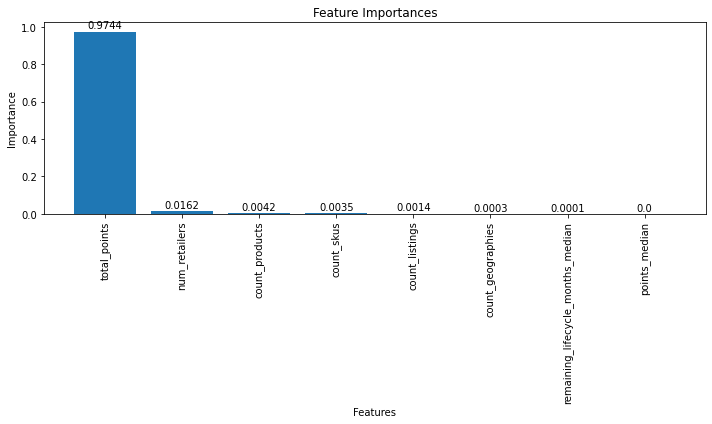

In [119]:
import matplotlib.pyplot as plt

# Plot feature importances
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_features = X.columns[sorted_indices]

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(sorted_features)), sorted_importances)
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')

for bar, importance in zip(bars, sorted_importances):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, round(importance, 4), ha='center', va='bottom')

plt.tight_layout()  # Ensures that labels fit in the figure properly

plt.show()


In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


In [64]:
'''GBRDict = {
    "n_estimators": [5,50,100,500],
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,3,6,8],
    "learning_rate": [0.005, 0.01, 0.015]}'''

'GBRDict = {\n    "n_estimators": [5,50,100,500],\n    "max_depth": [2,4,6,8],\n    "min_samples_split": [2,3,6,8],\n    "learning_rate": [0.005, 0.01, 0.015]}'

'GBRDict = {\n    "n_estimators": [5,50,100, 200, 300, 400, 500],\n    "max_depth": [2,3,4,5,6,7,8],\n    "min_samples_split": [1,2,3,4,6,7,8],\n    "learning_rate": [0.005, 0.01, 0.015],\n    "min_samples_leaf": [1,3,5]}'

In [94]:
GBRDict = {
    "n_estimators": [50, 70, 85, 100, 150, 250,500],
    "max_depth": [2,3,4,5,6,7,8],
    "min_samples_split": [2,3,4,6,7,8],
    "learning_rate": [0.005, 0.01, 0.015],
    "min_samples_leaf": [2,3,5]}

In [78]:
GBR = GradientBoostingRegressor(random_state = 7)

In [101]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [102]:
GBR_class = GridSearchCV(GBR, GBRDict, n_jobs=4,
                        verbose = 3, # setting verbose = 3 gives us some information about all the fits, so we see what's happening as we wait and don't get bored...
                        cv = cv, # Cross Validation can be useful... but time intensive. Default here is five... so set this down to 3, which is a reasonable min.
                        scoring = 'r2',
                        error_score='raise') 

In [103]:
GBR_class.fit(X_train_4, y_train) 

Fitting 30 folds for each of 2646 candidates, totalling 79380 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score='raise',
             estimator=GradientBoostingRegressor(random_state=7), n_jobs=4,
             param_grid={'learning_rate': [0.005, 0.01, 0.015],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 4, 6, 7, 8],
                         'n_estimators': [50, 70, 85, 100, 150, 250, 500]},
             scoring='r2', verbose=3)

In [107]:
# Let's get the grid search results
GridResults = pd.DataFrame(GBR_class.cv_results_)  # We make them a pandas dataframe, just because it looks nice
GridResults = GridResults.sort_values("rank_test_score")  # And we sort them by rank
GridResults.head(10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
1777,0.363904,0.064486,0.003284,0.000774,0.015,2,2,3,500,"{'learning_rate': 0.015, 'max_depth': 2, 'min_...",...,0.983330,0.975385,0.981842,0.972765,0.911418,0.985391,0.937505,0.965015,0.026421,1
1784,0.398797,0.036265,0.003253,0.000742,0.015,2,2,4,500,"{'learning_rate': 0.015, 'max_depth': 2, 'min_...",...,0.983330,0.975385,0.981842,0.972765,0.911418,0.985391,0.937505,0.965015,0.026421,1
1770,0.343367,0.014564,0.003087,0.000641,0.015,2,2,2,500,"{'learning_rate': 0.015, 'max_depth': 2, 'min_...",...,0.983330,0.975385,0.981842,0.972765,0.911418,0.985391,0.937505,0.965015,0.026421,1
1798,0.335894,0.015359,0.003147,0.000618,0.015,2,2,7,500,"{'learning_rate': 0.015, 'max_depth': 2, 'min_...",...,0.983375,0.975599,0.982790,0.972830,0.914059,0.984000,0.937235,0.964828,0.026221,4
1805,0.324797,0.012209,0.002971,0.000580,0.015,2,2,8,500,"{'learning_rate': 0.015, 'max_depth': 2, 'min_...",...,0.983375,0.975639,0.982260,0.973293,0.914059,0.984000,0.937874,0.964802,0.026268,5
1791,0.396397,0.031130,0.003204,0.000729,0.015,2,2,6,500,"{'learning_rate': 0.015, 'max_depth': 2, 'min_...",...,0.983263,0.975731,0.982721,0.972686,0.911808,0.983946,0.937301,0.964757,0.026309,6
1910,0.352150,0.015583,0.003027,0.000837,0.015,3,2,4,500,"{'learning_rate': 0.015, 'max_depth': 3, 'min_...",...,0.981889,0.974195,0.972964,0.977449,0.897988,0.990999,0.948738,0.964740,0.028127,7
1903,0.380801,0.023632,0.003514,0.000916,0.015,3,2,3,500,"{'learning_rate': 0.015, 'max_depth': 3, 'min_...",...,0.981889,0.974195,0.972964,0.977449,0.897988,0.990999,0.948738,0.964740,0.028127,7
1896,0.376664,0.019556,0.003290,0.000644,0.015,3,2,2,500,"{'learning_rate': 0.015, 'max_depth': 3, 'min_...",...,0.981889,0.974195,0.972964,0.977449,0.897988,0.990999,0.948738,0.964740,0.028127,7
1917,0.384796,0.046258,0.003270,0.000699,0.015,3,2,6,500,"{'learning_rate': 0.015, 'max_depth': 3, 'min_...",...,0.981828,0.973763,0.973834,0.977576,0.898395,0.990836,0.950431,0.964149,0.027801,10


In [105]:
# Let's get the best estimator and use that as the model 
GBR_model = GBR_class.best_estimator_

y_pred = GBR_model.predict(X_test_4)

## Set up results df

results_class = pd.DataFrame(index = ['Gradient Boosting Regressor', 'Ridge', "Lasso", 'ElasticNet'], 
                       columns = ['RMSE', 'MAE', 'R2']) 

results_class = get_reg_results(y_test, y_pred, results_class, 'Gradient Boosting Regressor')


print('The best parameters are {}'.format(GBR_class.best_params_))

The best parameters are {'learning_rate': 0.015, 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


In [106]:
results_class

,RMSE,MAE,R2
Gradient Boosting Regressor,7.086,4.378,0.954
Ridge,NaN,NaN,NaN
Lasso,NaN,NaN,NaN
ElasticNet,NaN,NaN,NaN


In [ ]:
##Gradient Boosting Regressor	7.679	4.58	0.946

In [ ]:
The best parameters are {'learning_rate': 0.015, 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
The best parameters are {'learning_rate': 0.015, 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100
The best parameters are {'learning_rate': 0.015, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 250}